___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Car Price Prediction Project***". This is the first medium project of ***Machine Learning*** course. In this project you will have the opportunity to apply many algorithms commonly used for regression problems.

Also, you will apply various processes such as pre-processing, ***train-test spilit*** and ***cross validation*** that you will use in algorithm modeling and prediction processes in Python with ***scikit-learn***. 

Before diving into the project, please take a look at the determines and tasks.

- **NOTE:** This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind regression algorithms and scikit-learn module as well as Machine Learning before you begin.


# #Determines

The domain you must have remembered it because you are worked on under project **"EDA for Car Price Prediction Model"**. **Auto Scout** data which using for this project, scraped from the on-line car trading company in 2019, contains many features of 9 different car models. In this project, you will use the data sets prepared for algorithms as a result of the EDA project.

So this study assumes that you are working on the EDA project and that you have sufficient domain knowledge.

Therefore, you will not need any EDA process as you will be working on the edited data.

---

In this case, you will estimate the prices of cars using regression algorithms.

While starting you should import the necessary modules and load the data given as pkl file. Also you'll need to do a few pre-processing before moving to modelling. After that you will implement ***Linear Regression, Ridge Regression, Lasso Regression, Random Forest*** and ***XG Boost*** algorithms respectively. You can measure the success of your models with regression evaluation metrics as well as with cross validation method.

For the better results, you should try to increase the success of your models by performing hyperparameter tuning. Determine feature importances for the model. You can set your model with the most important features for resource saving. You should try to apply this especially in Random Forest and XG Boost algorithms. Unlike the others, you will perform hyperparameter tuning for Random Forest and XG Boost using the ***GridSearchCV*** method. 

Finally You can compare the performances of algorithms, work more on the algorithm have the most successful prediction rate.






# #Tasks

#### 1. Import Modules, Load Data and Data Review
#### 2. Data Pre-Processing
#### 3. Implement Linear Regression 
#### 4. Implement Ridge Regression
#### 5. Implement Lasso Regression 

## 1. Import Modules, Load Data and Data Review

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_pickle('golden_data_dummy.pkl')

In [3]:
df.head()

,displacement,hp,km,ss_abs,ss_adaptive_cruise_control,ss_adaptive_headlights,ss_alarm_system,ss_blind_spot_monitor,ss_central_door_lock,ss_central_door_lock_with_remote_control,...,gearing_type_Semi-automatic,fuel_diesel,fuel_electric,fuel_gasoline,fuel_lpg,type_Demonstration,type_Employee's car,type_New,type_Pre-registered,type_Used
0,1422.0,66.0,56013,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,1,0,0,0,0,0,0,0,1
1,1798.0,141.0,80000,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0,0,0,1,0,0,0,0,0,1
2,1598.0,85.0,83450,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,1,0,0,0,0,0,0,0,1
3,1422.0,66.0,73000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0,1,0,0,0,0,0,0,0,1
4,1422.0,66.0,16200,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,1,0,0,0,0,0,0,0,1


In [4]:
df.shape

(14990, 136)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14990 entries, 0 to 15918
Columns: 136 entries, displacement to type_Used
dtypes: float64(86), int64(5), uint8(45)
memory usage: 11.2 MB


In [6]:
df.describe()

,displacement,hp,km,ss_abs,ss_adaptive_cruise_control,ss_adaptive_headlights,ss_alarm_system,ss_blind_spot_monitor,ss_central_door_lock,ss_central_door_lock_with_remote_control,...,gearing_type_Semi-automatic,fuel_diesel,fuel_electric,fuel_gasoline,fuel_lpg,type_Demonstration,type_Employee's car,type_New,type_Pre-registered,type_Used
count,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,...,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000
mean,1432.258843,88.231744,33894.105203,0.949767,0.080187,0.133422,0.126484,0.082188,0.859239,0.155704,...,0.030754,0.471781,0.000133,0.524149,0.003936,0.051634,0.067178,0.054236,0.090127,0.736825
std,271.764876,26.617304,37284.577857,0.218434,0.271591,0.340042,0.332405,0.274660,0.347786,0.362586,...,0.172656,0.499220,0.011550,0.499433,0.062616,0.221295,0.250339,0.226491,0.286373,0.440372
min,890.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1229.000000,66.000000,5000.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1461.000000,85.000000,22487.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1598.000000,100.000000,49264.500000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,2967.000000,294.000000,317000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.isnull().sum().any()

False

In [8]:
df.corr()

,displacement,hp,km,ss_abs,ss_adaptive_cruise_control,ss_adaptive_headlights,ss_alarm_system,ss_blind_spot_monitor,ss_central_door_lock,ss_central_door_lock_with_remote_control,...,gearing_type_Semi-automatic,fuel_diesel,fuel_electric,fuel_gasoline,fuel_lpg,type_Demonstration,type_Employee's car,type_New,type_Pre-registered,type_Used
displacement,1.000000,0.608069,0.306380,0.039455,0.219180,0.256791,0.075198,0.284346,0.008668,0.011990,...,0.101407,0.647354,-0.004512,-0.643471,-0.027935,-0.036014,-0.002039,-0.089162,-0.104255,0.132912
hp,0.608069,1.000000,0.013735,-0.025535,0.252995,0.331149,0.040451,0.433349,-0.026401,-0.048050,...,0.094190,0.111304,0.009755,-0.107138,-0.034652,0.111306,-0.016734,0.067898,-0.036446,-0.057641
km,0.306380,0.013735,1.000000,0.003092,0.046383,0.007789,0.106760,-0.018739,-0.015460,0.077596,...,0.032341,0.428175,0.002026,-0.433719,0.045312,-0.180433,-0.100492,-0.217220,-0.280735,0.442080
ss_abs,0.039455,-0.025535,0.003092,1.000000,0.043162,0.040839,-0.031936,0.046580,0.248538,0.070964,...,-0.042177,0.019120,-0.023786,-0.020374,0.014457,0.013637,0.021455,0.005178,0.030786,-0.041733
ss_adaptive_cruise_control,0.219180,0.252995,0.046383,0.043162,1.000000,0.202003,0.255668,0.316794,0.037572,0.104905,...,0.239071,0.092960,0.017857,-0.102319,0.071671,0.048770,0.031647,-0.020815,-0.008863,-0.026030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
type_Demonstration,-0.036014,0.111306,-0.180433,0.013637,0.048770,0.043205,-0.058861,0.106895,0.031162,-0.052810,...,-0.025849,-0.123895,-0.002695,0.125743,-0.014668,1.000000,-0.062618,-0.055877,-0.073438,-0.390428
type_Employee's car,-0.002039,-0.016734,-0.100492,0.021455,0.031647,0.022449,-0.017133,0.013814,0.051146,-0.007933,...,-0.018475,0.003158,-0.003100,-0.002038,-0.008357,-0.062618,1.000000,-0.064264,-0.084460,-0.449029
type_New,-0.089162,0.067898,-0.217220,0.005178,-0.020815,0.028177,-0.024663,0.051672,0.003759,-0.055720,...,-0.017066,-0.163772,-0.002766,0.164474,-0.005645,-0.055877,-0.064264,1.000000,-0.075368,-0.400694
type_Pre-registered,-0.104255,-0.036446,-0.280735,0.030786,-0.008863,-0.019357,-0.019540,0.027960,0.066428,-0.018862,...,-0.033124,-0.137841,-0.003636,0.136149,0.013701,-0.073438,-0.084460,-0.075368,1.000000,-0.526618


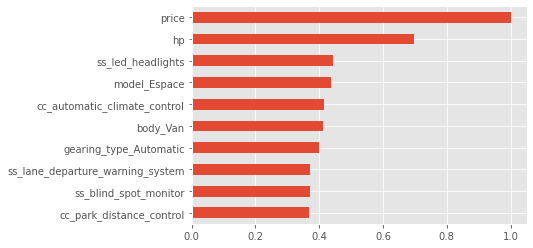

In [9]:
df.corr()['price'].sort_values().tail(10).plot.barh()

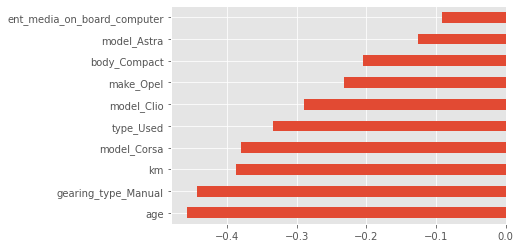

In [10]:
df.corr()['price'].sort_values().head(10).plot.barh()

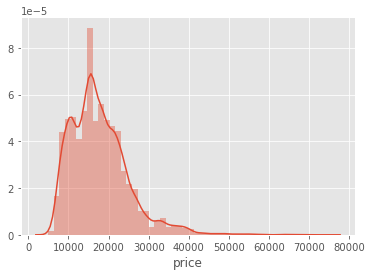

In [11]:
sns.distplot(df['price'])

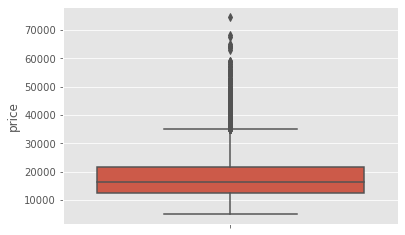

In [12]:
sns.boxplot(df.price, orient='v')

In [13]:
df.columns[:50]

Index(['displacement', 'hp', 'km', 'ss_abs', 'ss_adaptive_cruise_control',
       'ss_adaptive_headlights', 'ss_alarm_system', 'ss_blind_spot_monitor',
       'ss_central_door_lock', 'ss_central_door_lock_with_remote_control',
       'ss_daytime_running_lights', 'ss_driver_drowsiness_detection',
       'ss_driver_side_airbag', 'ss_electronic_stability_control',
       'ss_emergency_brake_assistant', 'ss_emergency_system', 'ss_fog_lights',
       'ss_head_airbag', 'ss_immobilizer', 'ss_isofix',
       'ss_led_daytime_running_lights', 'ss_led_headlights',
       'ss_lane_departure_warning_system', 'ss_night_view_assist',
       'ss_passenger_side_airbag', 'ss_power_steering', 'ss_rear_airbag',
       'ss_side_airbag', 'ss_tire_pressure_monitoring_system',
       'ss_traction_control', 'ss_traffic_sign_recognition',
       'ss_xenon_headlights', 'consumption_comb', 'inspection_new', 'price',
       'age', 'ent_media_bluetooth', 'ent_media_cd_player',
       'ent_media_digital_radio', 'ent

In [14]:
df.columns[50:100]

Index(['cc_air_suspension', 'cc_armrest', 'cc_automatic_climate_control',
       'cc_auxiliary_heating', 'cc_cruise_control', 'cc_electric_starter',
       'cc_electric_tailgate', 'cc_electrical_side_mirrors',
       'cc_electrically_adjustable_seats', 'cc_electrically_heated_windshield',
       'cc_heads_up_display', 'cc_heated_steering_wheel', 'cc_hill_holder',
       'cc_keyless_central_door_lock', 'cc_leather_seats',
       'cc_leather_steering_wheel', 'cc_light_sensor', 'cc_lumbar_support',
       'cc_massage_seats', 'cc_multi_function_steering_wheel',
       'cc_navigation_system', 'cc_panorama_roof', 'cc_park_distance_control',
       'cc_parking_assist_system_camera',
       'cc_parking_assist_system_self_steering',
       'cc_parking_assist_system_sensors_front',
       'cc_parking_assist_system_sensors_rear', 'cc_power_windows',
       'cc_rain_sensor', 'cc_seat_heating', 'cc_seat_ventilation',
       'cc_split_rear_seats', 'cc_start_stop_system', 'cc_sunroof',
       'cc_tin

In [15]:
df.columns[100:]

Index(['model_Espace', 'model_Insignia', 'body_Compact', 'body_Convertible',
       'body_Coupe', 'body_Off-Road', 'body_Other', 'body_Sedans',
       'body_Station wagon', 'body_Transporter', 'body_Van',
       'body_color_Beige', 'body_color_Black', 'body_color_Blue',
       'body_color_Bronze', 'body_color_Brown', 'body_color_Green',
       'body_color_Grey', 'body_color_Orange', 'body_color_Red',
       'body_color_Silver', 'body_color_Violet', 'body_color_White',
       'body_color_Yellow', 'gearing_type_Automatic', 'gearing_type_Manual',
       'gearing_type_Semi-automatic', 'fuel_diesel', 'fuel_electric',
       'fuel_gasoline', 'fuel_lpg', 'type_Demonstration',
       'type_Employee's car', 'type_New', 'type_Pre-registered', 'type_Used'],
      dtype='object')

## 2. Data Pre-Processing

As you know, the data set must be edited before proceeding to the implementation of the model. As the last step before model fitting, you need to spilit the data set as train and test. Then, you should train the model with train data and evaluate the performance of the model on the test data. You can use the train and test data you have created for all algorithms.

You must also drop your target variable, the column you are trying to predict.

You can use many [performance metrics for regression](https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-problems-343c4923d922) to measure the performance of the regression model you train. You can define a function to view different metric results together.

You can also use the [cross validation](https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85) method to measure the estimator performance. Cross validation uses different data samples from your test set and calculates the accuracy score for each data sample. You can calculate the final performance of your estimator by averaging these scores.

In [16]:
X = df.drop('price', axis=1)

In [17]:
y = df['price']

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
X.shape

(14990, 135)

In [21]:
X_train.shape

(11992, 135)

In [22]:
X_test.shape

(2998, 135)

## 3. Implement Linear Regression

 - Import the modul
 - Fit the model 
 - Predict the test set
 - Determine feature coefficiant
 - Evaluate model performance (use performance metrics for regression and cross_val_score)
 - Compare different evaluation metrics
 
*Note: You can use the [dir()](https://www.geeksforgeeks.org/python-dir-function/) function to see the methods you need.*

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
lm = LinearRegression()

In [25]:
lm.fit(X_train, y_train)

LinearRegression()

In [26]:
lm.intercept_

12863.602080588318

In [27]:
lm.coef_[:10]

array([-1.07324683e+00,  1.00166983e+02, -3.66043273e-02, -4.31072316e+01,
       -2.11696074e+01,  2.90467232e+02,  1.47113286e+02, -4.26342916e+02,
       -2.45857390e+02,  1.44234756e+01])

In [28]:
pd.DataFrame(lm.coef_, X_train.columns, columns= ['Coeff']).sample(10)

,Coeff
ext_touch_screen,-574.468461
body_Other,-779.360713
body_color_Black,608.033389
ent_media_sound_system,-190.184859
ent_media_hands_free_equipment,-79.170047
body_Off-Road,-399.294425
ss_rear_airbag,-570.148532
fuel_lpg,811.440082
ext_voice_control,-251.756693
cc_wind_deflector,-943.039898


In [29]:
lm.score(X_test, y_test)*100

89.17673810996845

In [30]:
y_pred = lm.predict(X_test)

In [31]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [32]:
# Creating a function for evalution metrics
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)

In [33]:
# Checking Evaluation metrics
eval_metrics(y_test, y_pred)

r2_score: 0.8917673810996846 
 mae: 1672.3867626668177 
 mse: 5481554.524313033 
 rmse: 2341.271988538075


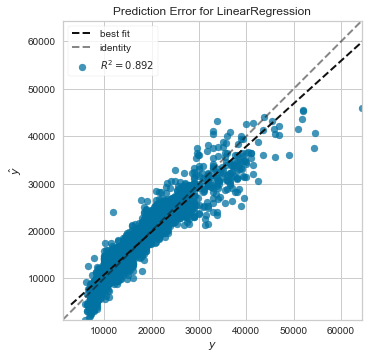

In [34]:
# Yellowbrick Prediction Error Plot
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(lm)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

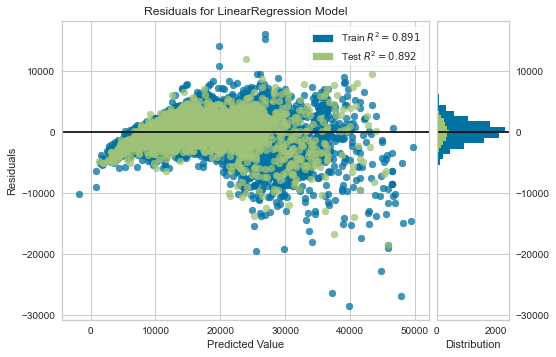

In [35]:
# Yellowbrick Residual Plot
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(lm)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [36]:
# Sample actual and predicted prices
comparison = {"Actual Value": y_test, "Model prediction": y_pred, "Diff": y_pred-y_test, 
              "Diff %": 100*(y_pred-y_test)/y_test}
pd.DataFrame(comparison).round(1).sample(10)

,Actual Value,Model prediction,Diff,Diff %
11664,17950,18882.2,932.2,5.2
15099,23000,22425.6,-574.4,-2.5
27,11300,12447.6,1147.6,10.2
6059,9480,10978.1,1498.1,15.8
2828,16990,17758.8,768.8,4.5
8333,13490,13985.5,495.5,3.7
9360,13950,15244.1,1294.1,9.3
12304,19290,21255.4,1965.4,10.2
1906,27650,23654.1,-3995.9,-14.5
15395,38290,38450.8,160.8,0.4


In [37]:
# Cross Validation Score
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(estimator=lm, X=X_train, y=y_train, cv=10)
cv_scores.mean()

0.8857213142604362

In [38]:
cv_scores

array([0.89934535, 0.8662727 , 0.88194013, 0.87955785, 0.89529942,
       0.88721162, 0.87829021, 0.88528645, 0.89981669, 0.88419272])

## 4. Implement Ridge Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True 
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hiperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value. 

In [39]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler

In [40]:
ridge_model=Ridge(normalize=True)

In [41]:
X_train.head()

,displacement,hp,km,ss_abs,ss_adaptive_cruise_control,ss_adaptive_headlights,ss_alarm_system,ss_blind_spot_monitor,ss_central_door_lock,ss_central_door_lock_with_remote_control,...,gearing_type_Semi-automatic,fuel_diesel,fuel_electric,fuel_gasoline,fuel_lpg,type_Demonstration,type_Employee's car,type_New,type_Pre-registered,type_Used
11428,1598.000000,100.0,36354,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,1,0,0,0,0,0,0,0,1
10377,1229.000000,51.0,5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,1,0,0,0,1,0,0
9020,1333.395989,51.0,133081,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,1,0,0,0,0,0,0,0,1
6908,1598.000000,81.0,59800,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,1,0,0,0,0,0,0,0,1
12791,1598.000000,147.0,5990,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0,0,0,1,0,1,0,0,0,0


In [42]:
ridge_model.fit(X_train, y_train)

Ridge(normalize=True)

In [43]:
y_pred = ridge_model.predict(X_test)

In [44]:
eval_metrics(y_test, y_pred)

r2_score: 0.8390485500575235 
 mae: 1963.3528962238245 
 mse: 8151555.0264889095 
 rmse: 2855.092822744807


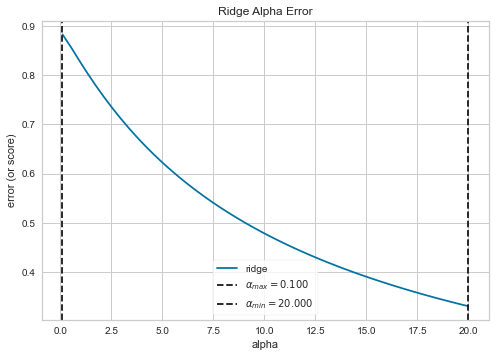

In [45]:
#let's find the same alpha with yellowbrick

from yellowbrick.regressor import ManualAlphaSelection

# Create a list of alphas to cross-validate against
alpha_space = np.linspace(0.1, 20, 50)

# Instantiate the visualizer
visualizer = ManualAlphaSelection(Ridge(normalize=True),alphas=alpha_space,cv=10)

visualizer.fit(X_train, y_train)
visualizer.show()

In [46]:
# train the ridge model again with best alpha
ridge_model = Ridge(0.1, normalize=True).fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.8908685496674182 
 mae: 1663.8811495596697 
 mse: 5527076.785108294 
 rmse: 2350.973582392685


In [47]:
accuraries = cross_val_score(estimator=ridge_model, X=X_train, y=y_train, cv=10)
accuraries.mean()

0.8826040513379271

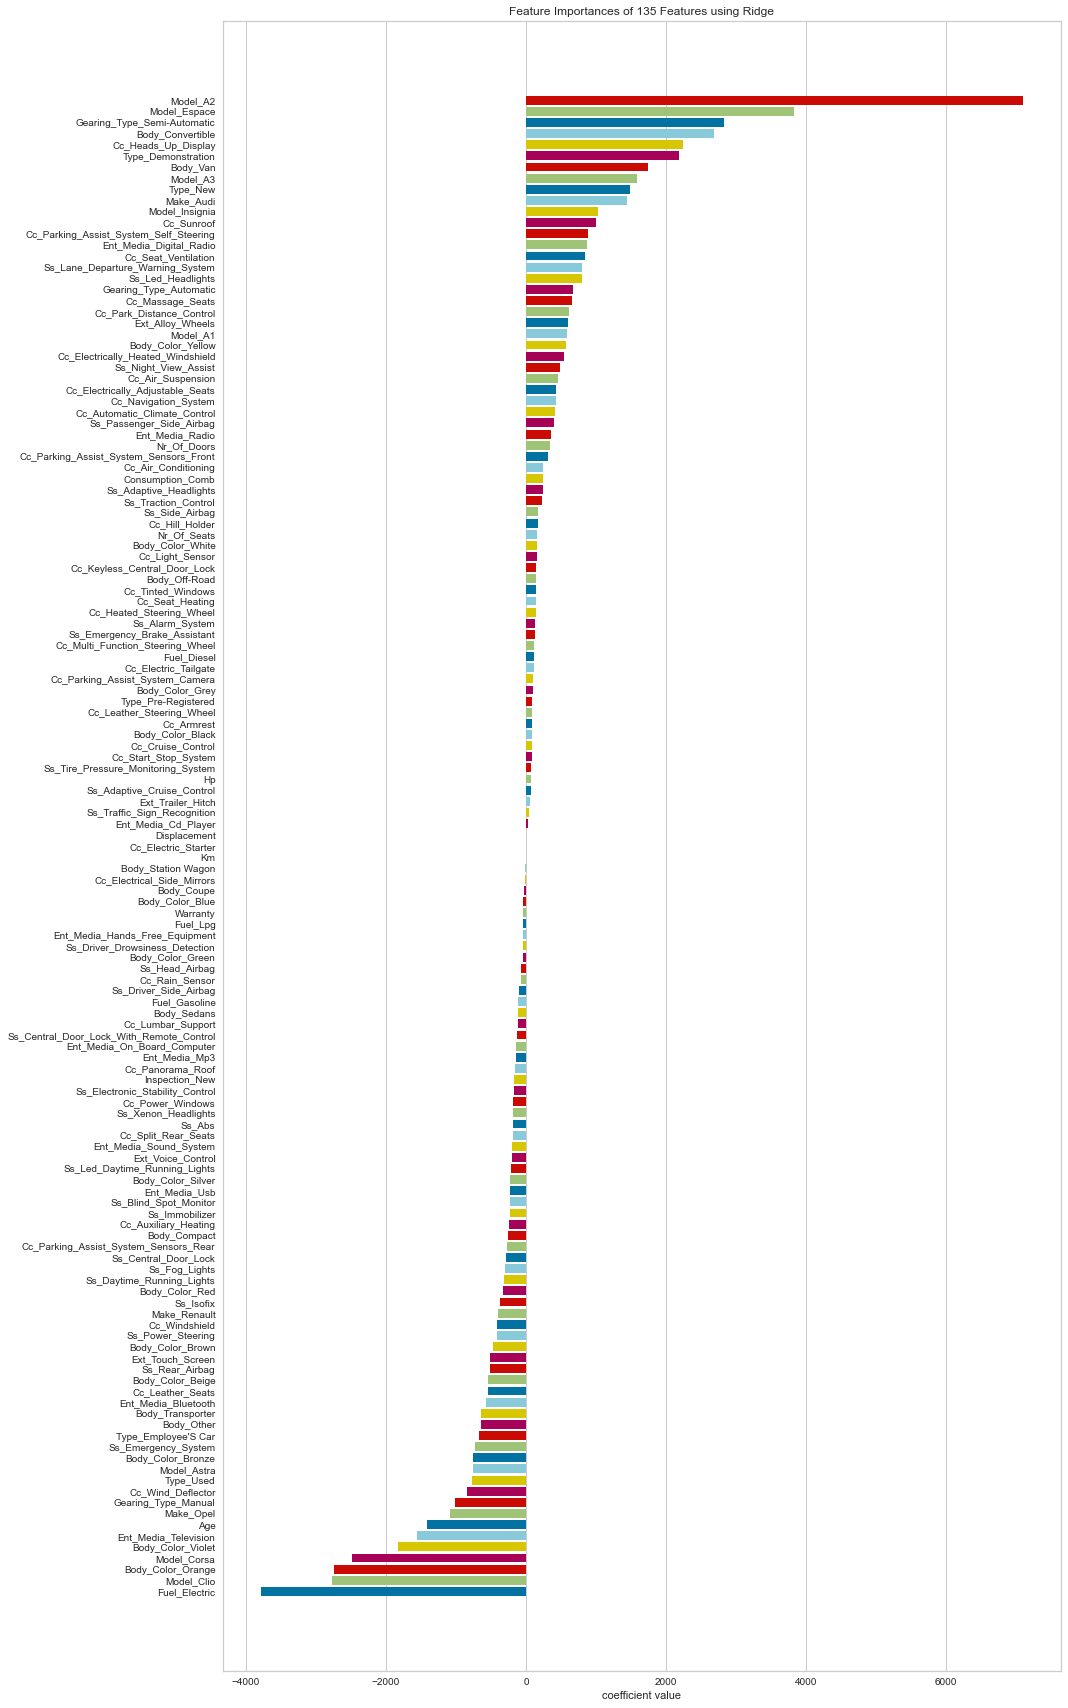

In [48]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz
# Load the regression dataset

# Title case the feature for better display and create the visualizer
labels = list(map(lambda s: s.title(), X.columns))
viz = FeatureImportances(ridge_model, labels=labels, relative=False)

# Fit and show the feature importances
viz.fit(X_train, y_train)
visualizer = RadViz(size=(1080, 1720))
viz.show()

## 5. Implement Lasso Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

*Note: To understand the importance of the alpha hyperparameter, you can observe the effects of different alpha values on feature coefficants.*

In [49]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

In [50]:
lasso_model = Lasso(normalize=True)
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.8840377602740636 
 mae: 1698.8273169126865 
 mse: 5873029.279690901 
 rmse: 2423.4333660513344


In [51]:
accuraries = cross_val_score(estimator=lasso_model, X=X_train, y=y_train, cv=10)
accuraries.mean()

0.8799041450877816

In [52]:
lasso_model.alpha

1.0

In [53]:
alpha_space = np.linspace(0.1, 20, 50)
lasso_cv_model = LassoCV(alphas = alpha_space, cv = 10, normalize=True).fit(X_train, y_train)

In [54]:
lasso_cv_model.alpha_

0.1

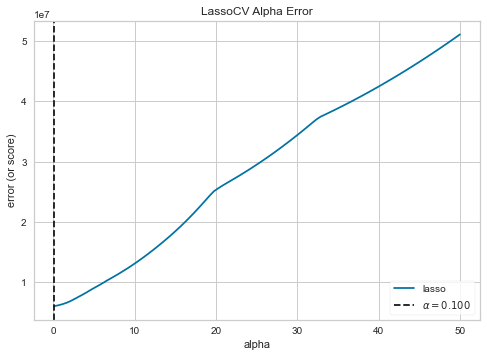

In [55]:
from sklearn.linear_model import LassoCV
from yellowbrick.regressor import AlphaSelection

# Create a list of alphas to cross-validate against
alpha_space = np.linspace(0.1, 50, 100)

# Instantiate the linear model and visualizer
model = LassoCV(alphas=alpha_space, normalize=True)
visualizer = AlphaSelection(model)
visualizer.fit(X_train, y_train)
visualizer.show()

In [56]:
lasso_model = Lasso(.1, normalize=True).fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.8917796626649902 
 mae: 1668.1568590125219 
 mse: 5480932.511554304 
 rmse: 2341.1391482682748


In [57]:
# cv score when alpha is 0.1
from sklearn.model_selection import cross_val_score
accuraries = cross_val_score(estimator=lasso_model, X=X_train, y=y_train, cv=10)
accuraries.mean()

0.8858977429278235

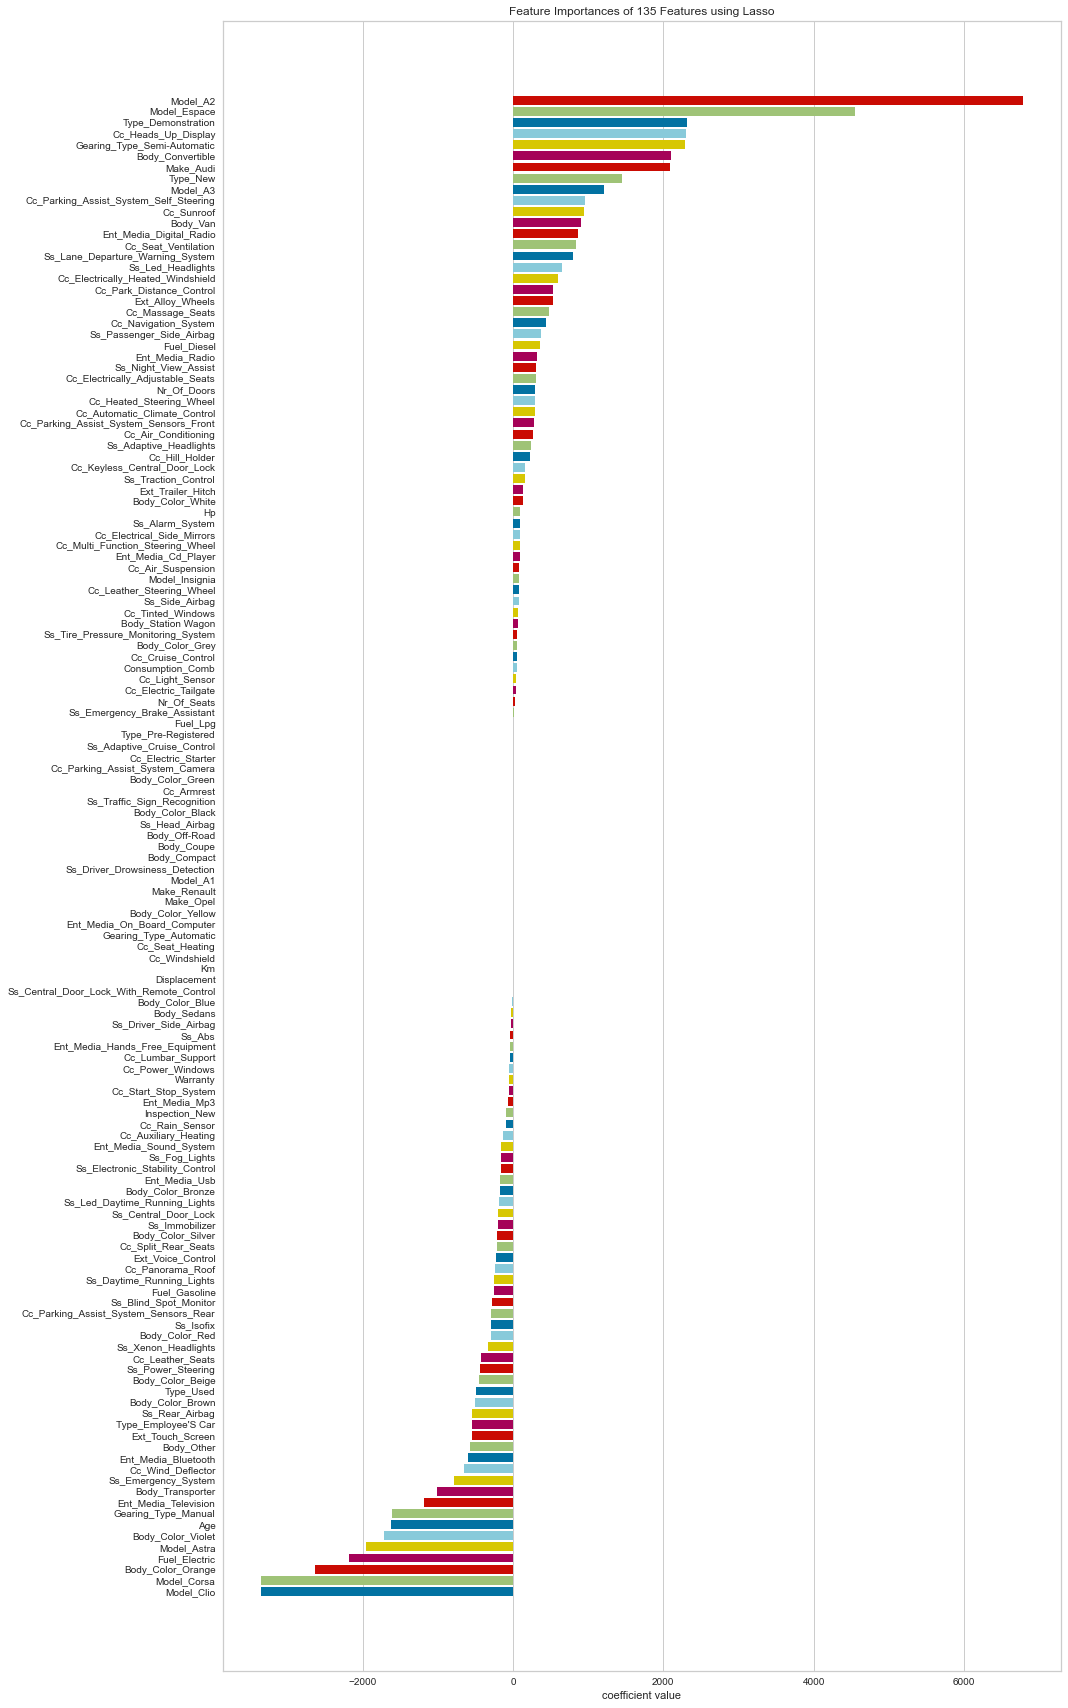

In [58]:
from sklearn.linear_model import Lasso
from yellowbrick.datasets import load_concrete
from yellowbrick.model_selection import FeatureImportances

# Load the regression dataset

# Title case the feature for better display and create the visualizer
labels = list(map(lambda s: s.title(), X.columns))
viz = FeatureImportances(lasso_model, labels=labels, relative=False)
visualizer = RadViz(size=(1080, 1720))
# Fit and show the feature importances
viz.fit(X_train, y_train)
viz.show()

In [59]:
# Create features DataFrame
feature_coef = pd.DataFrame({'features': X.columns, 'coef': lasso_model.coef_})

In [60]:
significant_features = feature_coef.loc[feature_coef.coef != 0, :]
len(significant_features)

113

In [61]:
significant_features.sort_values(by="coef", ascending=False)

,features,coef
94,model_A2,6786.351234
99,model_Espace,4546.567873
130,type_Demonstration,2311.945030
59,cc_heads_up_display,2307.033956
125,gearing_type_Semi-automatic,2285.278735
...,...,...
96,model_Astra,-1954.013479
127,fuel_electric,-2186.999891
117,body_color_Orange,-2638.408822
98,model_Corsa,-3354.533550


## Linear Regression with Selected Features and Not Dummied Dataset and Saving Sci-kit Model

In [62]:
df2=pd.read_pickle("golden_data_not_dummy.pkl")

In [63]:
df2.head()

,displacement,make,model,hp,km,ss_abs,ss_adaptive_cruise_control,ss_adaptive_headlights,ss_alarm_system,ss_blind_spot_monitor,...,cc_split_rear_seats,cc_start_stop_system,cc_sunroof,cc_tinted_windows,cc_wind_deflector,cc_windshield,ext_alloy_wheels,ext_touch_screen,ext_trailer_hitch,ext_voice_control
0,1422.0,Audi,A1,66.0,56013,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1798.0,Audi,A1,141.0,80000,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1598.0,Audi,A1,85.0,83450,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1422.0,Audi,A1,66.0,73000,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1422.0,Audi,A1,66.0,16200,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [64]:
new_list=["hp", "age", "km", "model"]

In [65]:
df2.shape

(14994, 98)

In [66]:
X=df2[new_list]

In [67]:
X.head()

,hp,age,km,model
0,66.0,3,56013,A1
1,141.0,2,80000,A1
2,85.0,3,83450,A1
3,66.0,3,73000,A1
4,66.0,3,16200,A1


In [68]:
y=df2["price"]

In [69]:
y.head()

0    15770
1    14500
2    14640
3    14500
4    16790
Name: price, dtype: int64

In [70]:
X=pd.get_dummies(X)

In [71]:
X.head()

,hp,age,km,model_A1,model_A2,model_A3,model_Astra,model_Clio,model_Corsa,model_Espace,model_Insignia
0,66.0,3,56013,1,0,0,0,0,0,0,0
1,141.0,2,80000,1,0,0,0,0,0,0,0
2,85.0,3,83450,1,0,0,0,0,0,0,0
3,66.0,3,73000,1,0,0,0,0,0,0,0
4,66.0,3,16200,1,0,0,0,0,0,0,0


In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
y_pred = lm.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.8225558949799248 
 mae: 2107.666498972439 
 mse: 9265854.348411836 
 rmse: 3043.9865880801503


### Pickle Library

In [73]:
import pickle
pickle.dump(lm, open("saved_model_pickle", 'wb'))

In [74]:
Auto_model=pickle.load(open("saved_model_pickle", "rb"))

### Creating an input dictionary for the model to have a prediction

In [75]:
my_dict = {
    "hp": 200,
    "age": 1,
    "km": 100000,
    "model": 'A3'
}

In [76]:
df = pd.DataFrame.from_dict([my_dict])

In [77]:
df.head()

,hp,age,km,model
0,200,1,100000,A3


In [78]:
columns=X.columns
columns

Index(['hp', 'age', 'km', 'model_A1', 'model_A2', 'model_A3', 'model_Astra',
       'model_Clio', 'model_Corsa', 'model_Espace', 'model_Insignia'],
      dtype='object')

In [79]:
# Adjusting input values for model to read, applying get dummies
df = pd.get_dummies(df).reindex(columns=columns, fill_value=0)

In [80]:
df.head()

,hp,age,km,model_A1,model_A2,model_A3,model_Astra,model_Clio,model_Corsa,model_Espace,model_Insignia
0,200,1,100000,0,0,1,0,0,0,0,0


In [81]:
pred=list(Auto_model.predict(df))

In [82]:
# Result for given input values
pred

[34805.69983017852]

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___